### Pre Test Problem 

Author : Forrest D Park 
1.  DataSet : 충남 논산 지역 농가 4곳의 생육 데이터 및 환경데이터 
2. RMSE 를 판정하는 것으로 보아 Regression model 사용 필요 
3. XGboost model 사용 해보자 

Data description : 
    1. 초장 
    2. 엽장
    3. 엽병장
    4. 엽수 
    5. 관부직경
    6. 화방꽃수 
    7. 개화수 



In [38]:
#### Jupyter Basic Setting ####
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns  # 시각화
import warnings; warnings.filterwarnings('ignore')  # 경고 무시
import sys,os
from pprint import pprint 
parent_dir = os.path.dirname(os.getcwd())
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)
from Functions import Service as S
# 기본 세팅
S.plotSetting("seaborn-v0_8")
def blue(str):return S.colored_text(str,'blue')
def yellow(str):return S.colored_text(str,'yellow')
def red(str):return S.colored_text(str,'red')
def green(str):return S.colored_text(str,'green')


___ 🟡 PLOTSETTING. 
______ 📌 matplotlibn plot 한글화 Setting
___## OS platform 한글 세팅완료 ## ___


In [34]:
import pandas as pd
import os 

환경B = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")
# 환경.head()

cwdir = os.getcwd() + "/Data"
env_data = {}
for i in os.listdir(cwdir):
    print(i)
    if i == "사전테스트-생육데이터.xlsx":
        out = pd.read_excel(os.path.join(cwdir,i))
    if i == "사전테스트-환경데이터":
        for num,j in enumerate(os.listdir(os.path.join(cwdir,i))):
            print(f"{num}", j)
            env_data[j.split(".")[0]] = pd.read_csv(os.path.join(cwdir,i,j),)
            

# a.tail(10)

S.dataInfoProcessing(out,PrintOutColnumber=7)

사전테스트-생육데이터.xlsx
.DS_Store
사전테스트-환경데이터.zip
사전테스트-환경데이터
0 environmentsC.csv
1 environmentsB.csv
2 environmentsE.csv
3 environmentsD.csv
___ 🟡 DATAINFOPROCESSING. 
______ 📌 Data frame 의 정제해야할 부분을 체크해주는 함수 입니다
  1️⃣ Data row/colum numbers : 9873/7
  2️⃣ null check 결과Null 없는 clean data!
  3️⃣ Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[시설아이디(object)]: 			4/9873 [uniq/raw]
	1.[생육주사(int64)]: 			33/9873 [uniq/raw]
	2.[조사일자(int64)]: 			41/9873 [uniq/raw]
	3.[표본번호(int64)]: 			9/9873 [uniq/raw]
	4.[조사항목(object)]: 			9/9873 [uniq/raw]
	5.[단위(object)]: 			3/9873 [uniq/raw]
	6.[조사항목값(float64)]: 		1272/9873 [uniq/raw]
	 ...etc (추가로 0개의 칼럼이 있습니다 )


,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.0
1,B농가,4,20231006,1,엽장,mm,79.0
2,B농가,4,20231006,1,엽폭,mm,70.0
3,B농가,4,20231006,1,엽병장,mm,139.0
4,B농가,4,20231006,1,엽수,개,5.0
...,...,...,...,...,...,...,...
9868,E농가,32,20240426,9,엽수,개,8.0
9869,E농가,32,20240426,9,관부직경,mm,27.9
9870,E농가,32,20240426,9,화방 꽃수(소화수),개,0.0
9871,E농가,32,20240426,9,착과수,개,0.0


---
#### 데이터  9872(row)  x 7(col)
1. 시설 아이디 는 4개 뿐 a 농가 이런식으로 되어있는데 수치화 해도 될것 같음
2. 생육주사 종류는 33가지 이며 integer
3. 조사 일자 -> 계절 월 수치같은거로 나누면 어떨까
4. 표본번호 :1~9 까지 있음 
5. 조사항목 9개의 종류가 있음 -> 원핫 인코딩 필요? 칼럼으로 만들 필요가 있음.  조사 항목 에 대한 조상 항목 값을 매칭 시켜야함. 

그렇다면 무엇을 맞추는것인가? output 이 무엇인가?? 이 생육 표본 데이터가 바로 아웃풋 데이터이다 인풋 데이터는 환경데이터가 되어야한다. 표본과 환경을 매칭할수있는지 확인하자. 



---
### Input data anlaysis


In [95]:
for i in env_data.keys():
    print(yellow(i)+  ": \n")
    print(blue(str(list(env_data[i].columns))))
    print("\tData shape :",env_data[i].shape)

environmentsC: 

['farm', 'datetime', 'supplyEC', 'supplyPH', 'innerCO2', 'innerHum', 'innerTemp', 'innerSolar']
	Data shape : (4280, 8)
environmentsB: 

['farm', 'datetime', 'supplyEC', 'supplyPH', 'innerCO2', 'innerHum', 'innerTemp', 'innerSolar']
	Data shape : (4740, 8)
environmentsE: 

['farm', 'datetime', 'supplyEC', 'supplyPH', 'innerCO2', 'innerHum', 'innerTemp', 'innerSolar']
	Data shape : (4204, 8)
environmentsD: 

['farm', 'datetime', 'supplyEC', 'supplyPH', 'innerCO2', 'innerHum', 'innerTemp', 'innerSolar']
	Data shape : (4232, 8)


---
### update output column 과 input data column 정제를 위한 데이터 시각화



In [140]:
print(out.columns)
print(red(out.shape))
for i in  out.columns:
    print(yellow(i)+ ": \n")
    print(out[i].unique())
    ## 조사항목과 조사항목갮을 매칭시켜서 칼럼화 시키자. 
    


Index(['시설아이디', '생육주사', '조사일자', '표본번호', '조사항목', '단위', '조사항목값'], dtype='object')
(9873, 7)
시설아이디: 

['B농가' 'C농가' 'D농가' 'E농가']
생육주사: 

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33  1  2  3]
조사일자: 

[20231006 20231013 20231020 20231027 20231103 20231110 20231117 20231124
 20231130 20231207 20231214 20231221 20231228 20240104 20240111 20240118
 20240125 20240202 20240207 20240215 20240222 20240228 20240307 20240314
 20240321 20240328 20240403 20240412 20240417 20240424 20230922 20230926
 20240201 20240306 20240320 20240327 20240404 20240411 20240418 20240426
 20231018]
표본번호: 

[1 2 3 4 5 6 7 8 9]
조사항목: 

['초장' '엽장' '엽폭' '엽병장' '엽수' '관부직경' '화방 꽃수(소화수)' '착과수' '최종화방차수']
단위: 

['mm' '개' '차']
조사항목값: 

[255.    79.    70.   ... 495.    23.65  27.9 ]


In [214]:
out.iloc[:,3:7]

wanted_table = pd.DataFrame({
    "표본번호" : [0],
    "생육주차" : [0],
    "초장": [0], 
    "엽장": [0], 
    "엽폭": [0], 
    "엽병장": [0], 
    "엽수": [0], 
    "관부직경수": [0], 
    "화방꽃수(소화수)": [0], 
    "착과수": [0], 
    "최종화방차수": [0]
})
print(wanted_table)

조사일 =out['조사일자'].unique()
## 테스트로 첫번째 조사일에서 만 해보자 
out[out['조사일자']== 조사일[0]].shape ## 247개의 row 가 있다. 

test= out
pivot_df= test.pivot_table(
    index  =['조사일자','표본번호','생육주사'],
    columns='조사항목',
    values ="조사항목값",
    fill_value =0
).reset_index()


pivot_df.rename(columns={
    "생육주사": "생육주차",
    "초장": "초장",
    "엽장": "엽장",
    "엽폭": "엽폭", 
    "엽병장": "엽병장",
    "엽수": "엽수",
    "관부직경": "관부직경수",
    "화방 꽃수(소화수)": "화방꽃수(소화수)",
    "착과수": "착과수",
    "최종화방차수": "최종화방차수"
}, inplace=True)
test_df = pivot_df
pivot_df.tail()


   표본번호  생육주차  초장  엽장  엽폭  엽병장  엽수  관부직경수  화방꽃수(소화수)  착과수  최종화방차수
0     0     0   0   0   0    0   0      0          0    0       0


조사항목,시설아이디,조사일자,표본번호,생육주차,관부직경수,엽병장,엽수,엽장,엽폭,착과수,초장,최종화방차수,화방꽃수(소화수)
1092,E농가,20240426,5,32,19.17,220.0,7.0,78.0,70.0,0.0,352.0,3.0,0.0
1093,E농가,20240426,6,32,29.35,307.0,6.0,97.0,87.0,0.0,480.0,3.0,0.0
1094,E농가,20240426,7,32,29.94,288.0,8.0,83.0,70.0,0.0,452.0,3.0,0.0
1095,E농가,20240426,8,32,23.65,319.0,4.0,95.0,81.0,0.0,495.0,3.0,0.0
1096,E농가,20240426,9,32,27.90,292.0,8.0,80.0,71.0,0.0,421.0,3.0,0.0


---
###생육 주차별 각 칼럼의 추세를 알아보자. 



In [187]:
## 표본번호 1의 관부직경수 


sample1 = test_df[test_df['표본번호']==1].sort_values('생육주차')

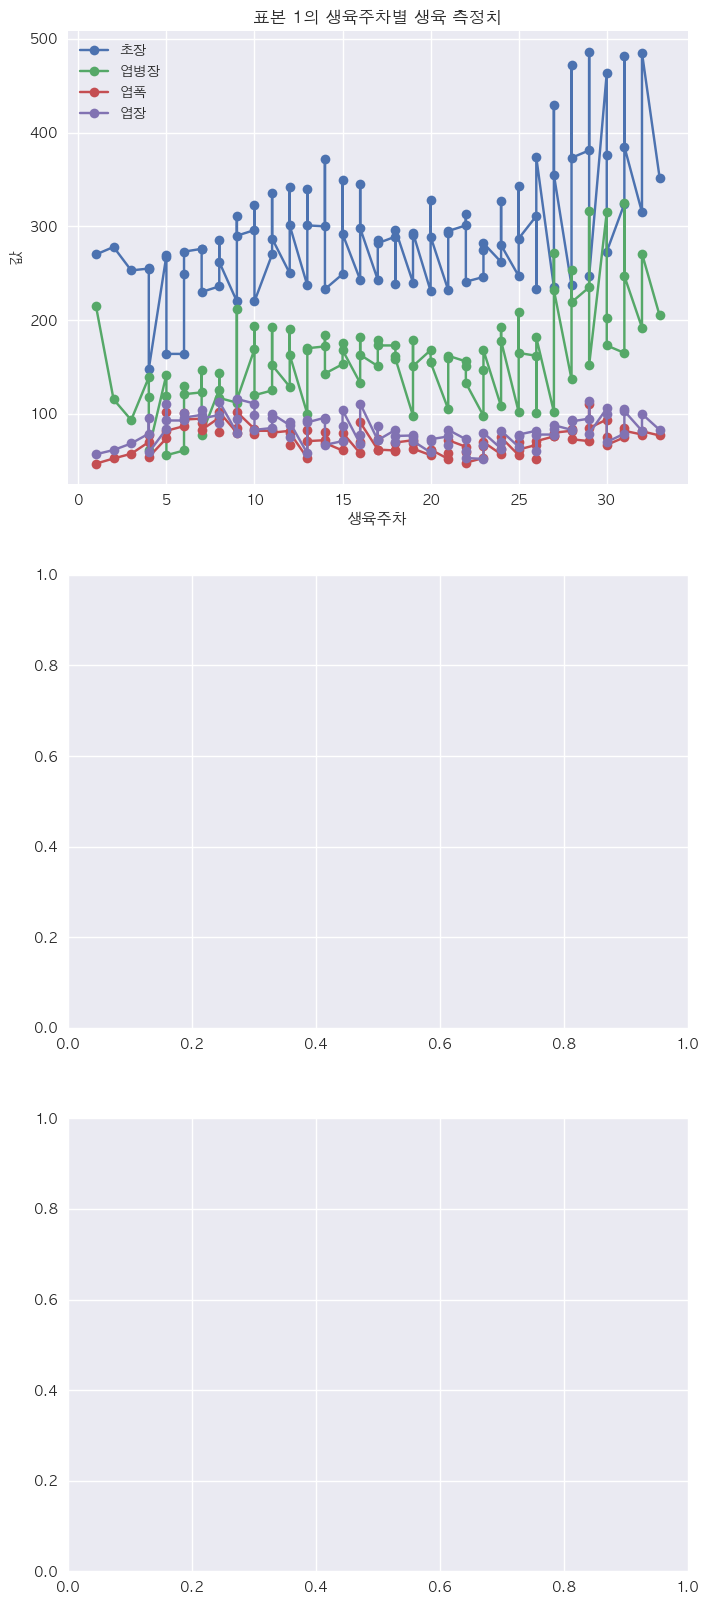

In [213]:
def dataPlotting():
    fig=plt.figure(figsize=(8,20))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    target_col=['초장','엽병장','엽폭','엽장']
    ax1.plot(sample1['생육주차'],
            sample1[target_col], '-o')
    ax1.set_xlabel("생육주차")
    ax1.set_ylabel("값")
    ax1.legend(test_df.columns[3:-1])
    ax1.set_title("표본 1의 생육주차별 생육 측정치")
    
    


    ax1.legend(target_col)


    plt.show()
dataPlotting()

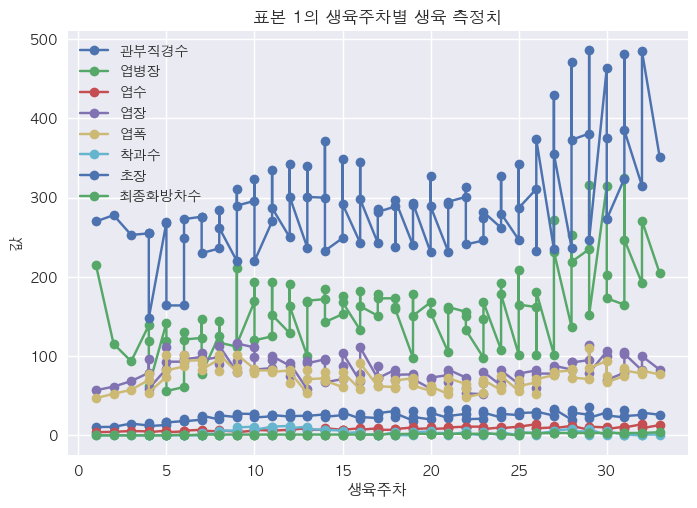

---
### 최종화방차수 값 과 엽장, 엽폭, 엽병장이랑 묶어야함. 

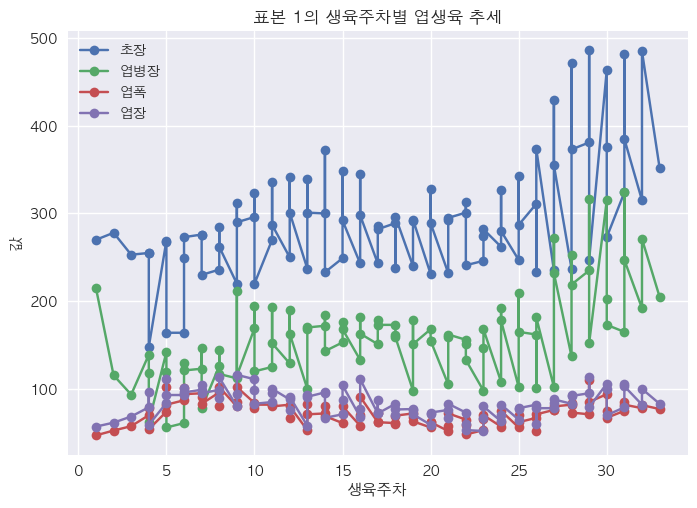

In [200]:
target_col=['초장','엽병장','엽폭','엽장']
plt.plot(sample1['생육주차'],
         sample1[target_col], '-o')
plt.xlabel("생육주차")
plt.ylabel("값")
plt.legend(target_col)
plt.title("표본 1의 생육주차별 엽생육 추세")
plt.show()

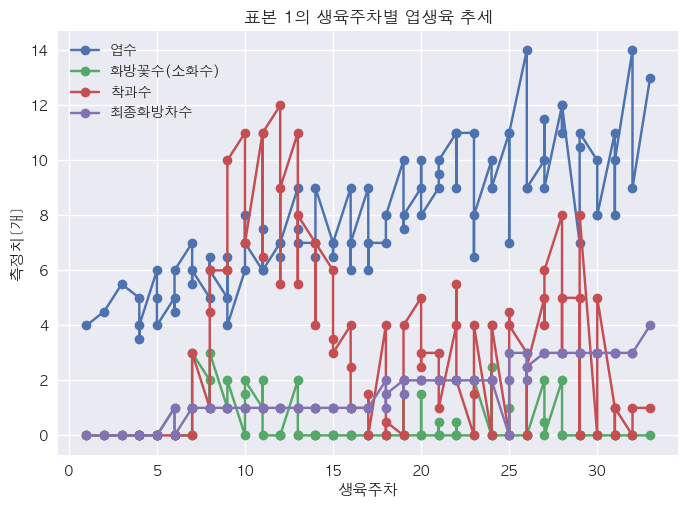

In [202]:
target_col=['엽수',  '화방꽃수(소화수)',  '착과수',  '최종화방차수']
plt.plot(sample1['생육주차'],
         sample1[target_col], '-o')
plt.xlabel("생육주차")
plt.ylabel("측정치[개]")
plt.legend(target_col)
plt.title("표본 1의 생육주차별 엽생육 추세")
plt.show()

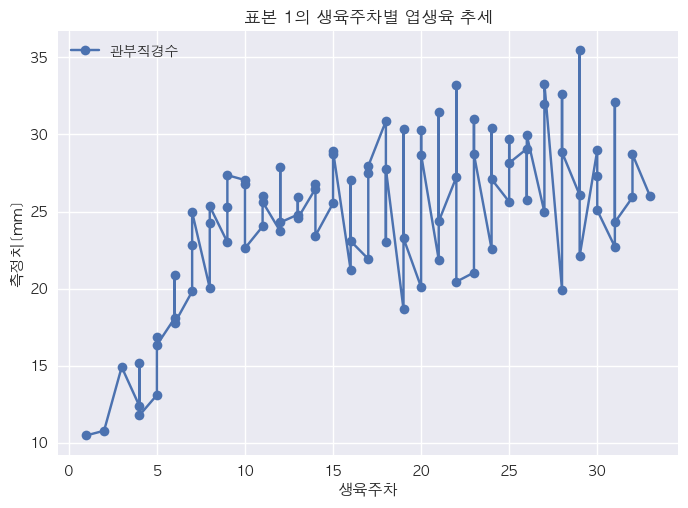

In [204]:
 
target_col=['관부직경수']
plt.plot(sample1['생육주차'],
         sample1[target_col], '-o')
plt.xlabel("생육주차")
plt.ylabel("측정치[mm]")
plt.legend(target_col)
plt.title("표본 1의 생육주차별 엽생육 추세")
plt.show()